# IMPORTATION

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
# sklearn libaries
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score,mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
                                  
# tensor
import tensorflow
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.optimizers import Adam

# torch
import torch
from torch.utils.data import Dataset

#Evaluation
import evaluate

# Transformer
import transformers
from transformers import Trainer, TrainingArguments, BertTokenizer, BertForSequenceClassification

# LOAD DATA

In [3]:
data = pd.read_csv(r"C:\Users\avina\Downloads\archive\india_2000_2024_daily_weather.csv")

In [4]:
data = data.sample(n=5000, random_state=42).reset_index(drop=True)

In [5]:
data

,city,date,temperature_2m_max,temperature_2m_min,apparent_temperature_max,apparent_temperature_min,precipitation_sum,rain_sum,weather_code,wind_speed_10m_max,wind_gusts_10m_max,wind_direction_10m_dominant
0,Ahmedabad,2008-10-11,36.0,23.2,41.3,26.2,0.0,0.0,0,8.4,18.0,359
1,Pune,2003-11-26,30.6,16.6,30.4,15.7,0.0,0.0,0,9.4,27.0,81
2,Hyderabad,2010-05-16,39.6,28.6,42.8,31.0,0.0,0.0,2,14.7,29.2,163
3,Bangalore,2009-05-31,28.8,20.8,32.7,23.8,8.4,8.4,63,11.4,28.4,252
4,Chennai,2002-06-13,33.7,27.0,39.0,31.8,3.4,3.4,61,17.7,29.2,191
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,Hyderabad,2013-07-11,23.2,21.5,25.2,22.3,16.5,16.5,61,23.9,47.5,271
4996,Jaipur,2011-07-29,31.1,25.3,36.1,30.4,5.0,5.0,61,10.7,24.1,258
4997,Mumbai,2009-11-27,31.5,22.6,36.0,25.5,0.0,0.0,3,10.9,19.4,16
4998,Lucknow,2017-08-20,32.2,27.0,38.6,30.9,1.0,1.0,53,21.5,43.6,89


In [6]:
data.columns

Index(['city', 'date', 'temperature_2m_max', 'temperature_2m_min',
       'apparent_temperature_max', 'apparent_temperature_min',
       'precipitation_sum', 'rain_sum', 'weather_code', 'wind_speed_10m_max',
       'wind_gusts_10m_max', 'wind_direction_10m_dominant'],
      dtype='object')

In [7]:
# Normilsing the numeric 
numeric_col = ['temperature_2m_max', 'temperature_2m_min',
       'apparent_temperature_max', 'apparent_temperature_min',
       'precipitation_sum', 'rain_sum','wind_speed_10m_max',
       'wind_gusts_10m_max']

scaler =  StandardScaler()
data[numeric_col] = scaler.fit_transform(data[numeric_col])

In [8]:
data

,city,date,temperature_2m_max,temperature_2m_min,apparent_temperature_max,apparent_temperature_min,precipitation_sum,rain_sum,weather_code,wind_speed_10m_max,wind_gusts_10m_max,wind_direction_10m_dominant
0,Ahmedabad,2008-10-11,1.093348,0.399828,1.401474,0.454430,-0.365432,-0.365432,0,-1.375562,-1.501308,359
1,Pune,2003-11-26,-0.047206,-0.852313,-0.437372,-0.978579,-0.365432,-0.365432,0,-1.181330,-0.539216,81
2,Hyderabad,2010-05-16,1.853718,1.424306,1.654527,1.109521,-0.365432,-0.365432,2,-0.151901,-0.304038,163
3,Bangalore,2009-05-31,-0.427391,-0.055496,-0.049359,0.126885,0.611410,0.611410,63,-0.792866,-0.389557,252
4,Chennai,2002-06-13,0.607556,1.120757,1.013461,1.218702,0.029956,0.029956,61,0.430795,-0.304038,191
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,Hyderabad,2013-07-11,-1.610188,0.077306,-1.314620,-0.077830,1.553365,1.553365,61,1.635033,1.652215,271
4996,Jaipur,2011-07-29,0.058401,0.798236,0.524226,1.027634,0.216022,0.216022,61,-0.928829,-0.849224,258
4997,Mumbai,2009-11-27,0.142886,0.285997,0.507356,0.358897,-0.365432,-0.365432,3,-0.889982,-1.351649,16
4998,Lucknow,2017-08-20,0.290736,1.120757,0.945980,1.095873,-0.249141,-0.249141,53,1.168876,1.235309,89


In [9]:
# cateorcal Encoder
encoder = LabelEncoder()

Labels  = ['city', 'date','weather_code', 'wind_direction_10m_dominant']

for label in Labels:
   data[label] = encoder.fit_transform(data[label])


In [10]:
data

,city,date,temperature_2m_max,temperature_2m_min,apparent_temperature_max,apparent_temperature_min,precipitation_sum,rain_sum,weather_code,wind_speed_10m_max,wind_gusts_10m_max,wind_direction_10m_dominant
0,0,1391,1.093348,0.399828,1.401474,0.454430,-0.365432,-0.365432,0,-1.375562,-1.501308,359
1,9,621,-0.047206,-0.852313,-0.437372,-0.978579,-0.365432,-0.365432,0,-1.181330,-0.539216,81
2,4,1649,1.853718,1.424306,1.654527,1.109521,-0.365432,-0.365432,2,-0.151901,-0.304038,163
3,1,1494,-0.427391,-0.055496,-0.049359,0.126885,0.611410,0.611410,8,-0.792866,-0.389557,252
4,2,376,0.607556,1.120757,1.013461,1.218702,0.029956,0.029956,7,0.430795,-0.304038,191
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4,2134,-1.610188,0.077306,-1.314620,-0.077830,1.553365,1.553365,7,1.635033,1.652215,271
4996,5,1829,0.058401,0.798236,0.524226,1.027634,0.216022,0.216022,7,-0.928829,-0.849224,258
4997,8,1577,0.142886,0.285997,0.507356,0.358897,-0.365432,-0.365432,3,-0.889982,-1.351649,16
4998,7,2807,0.290736,1.120757,0.945980,1.095873,-0.249141,-0.249141,5,1.168876,1.235309,89


In [11]:
data['date'] = pd.to_datetime(data['date'])
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['day']  = data['date'].dt.day
data['day_of_year'] = data['date'].dt.dayofyear


In [12]:
data

,city,date,temperature_2m_max,temperature_2m_min,apparent_temperature_max,apparent_temperature_min,precipitation_sum,rain_sum,weather_code,wind_speed_10m_max,wind_gusts_10m_max,wind_direction_10m_dominant,year,month,day,day_of_year
0,0,1970-01-01 00:00:00.000001391,1.093348,0.399828,1.401474,0.454430,-0.365432,-0.365432,0,-1.375562,-1.501308,359,1970,1,1,1
1,9,1970-01-01 00:00:00.000000621,-0.047206,-0.852313,-0.437372,-0.978579,-0.365432,-0.365432,0,-1.181330,-0.539216,81,1970,1,1,1
2,4,1970-01-01 00:00:00.000001649,1.853718,1.424306,1.654527,1.109521,-0.365432,-0.365432,2,-0.151901,-0.304038,163,1970,1,1,1
3,1,1970-01-01 00:00:00.000001494,-0.427391,-0.055496,-0.049359,0.126885,0.611410,0.611410,8,-0.792866,-0.389557,252,1970,1,1,1
4,2,1970-01-01 00:00:00.000000376,0.607556,1.120757,1.013461,1.218702,0.029956,0.029956,7,0.430795,-0.304038,191,1970,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4,1970-01-01 00:00:00.000002134,-1.610188,0.077306,-1.314620,-0.077830,1.553365,1.553365,7,1.635033,1.652215,271,1970,1,1,1
4996,5,1970-01-01 00:00:00.000001829,0.058401,0.798236,0.524226,1.027634,0.216022,0.216022,7,-0.928829,-0.849224,258,1970,1,1,1
4997,8,1970-01-01 00:00:00.000001577,0.142886,0.285997,0.507356,0.358897,-0.365432,-0.365432,3,-0.889982,-1.351649,16,1970,1,1,1
4998,7,1970-01-01 00:00:00.000002807,0.290736,1.120757,0.945980,1.095873,-0.249141,-0.249141,5,1.168876,1.235309,89,1970,1,1,1


In [13]:
def row_text(row):
    return f"city {row['city']},month{row['month']} weather{row['weather_code']}, Tmin{row['temperature_2m_min']},Tmax{row['temperature_2m_max']},Wind{row['wind_direction_10m_dominant']}, rain{row['rain_sum']}"

data['text'] = data.apply(row_text, axis=1)

In [14]:
data['text']

0       city 0,month1 weather0, Tmin0.3998275104099081...
1       city 9,month1 weather0, Tmin-0.852313230524949...
2       city 4,month1 weather2, Tmin1.4243062984475197...
3       city 1,month1 weather8, Tmin-0.055496395384585...
4       city 2,month1 weather7, Tmin1.120757027917857,...
                              ...                        
4995    city 4,month1 weather7, Tmin0.0773064104721417...
4996    city 5,month1 weather7, Tmin0.7982359279800906...
4997    city 8,month1 weather3, Tmin0.2859965339612850...
4998    city 7,month1 weather5, Tmin1.120757027917857,...
4999    city 2,month1 weather3, Tmin0.3239401927774927...
Name: text, Length: 5000, dtype: object

In [15]:
# predicting next day's max temperature

data['next_day_temp_max'] = data['temperature_2m_max'].shift(-1)
data = data.dropna()  

In [16]:
Y = data['next_day_temp_max']
X = data['text']

In [17]:
train_text = X[:-365]       #2000 - 2023
train_labels =   Y[:-365]

test_text = X[-365:]        #2024
test_labels =   Y[-365:]

In [18]:
# Tokenizer

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [19]:
# Tokneizing
train_encodings = tokenizer(train_text.tolist(), truncation=True, padding=True, max_length=128)
test_encodings = tokenizer(test_text.tolist(), truncation=True, padding=True, max_length=128)


In [20]:
class weather(Dataset):
    def __init__(self,encoding,labels):
        self.encoding = encoding
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self,idx):
        item = {key: torch.tensor(val[idx]) for key,val in self.encoding.items()}
        item['labels'] = torch.tensor(self.labels.iloc[idx],dtype=torch.float)
        return item

train_dataset = weather(train_encodings, train_labels)
test_dataset =   weather(test_encodings, test_labels)        

In [21]:
# model
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=1, )

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [22]:
# Training_args
training_args = TrainingArguments(
    output_dir = './results',
    num_train_epochs = 3,
    per_device_train_batch_size =8,
    per_device_eval_batch_size =8,
    warmup_steps = 500,
    weight_decay = 0.01,
    logging_dir = './logs',
    eval_strategy="epoch"    
)

In [23]:
#coumpute metrics

def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = predictions.flatten()
    labels = labels.flatten()
    
    mae = mean_absolute_error(labels, predictions)
    mse = mean_squared_error(labels, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(labels, predictions)
    
    return {
        'mae': mae,
        'mse': mse,
        'rmse': rmse,
        'r2': r2
    }

In [29]:
#Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics
  
)

In [25]:
# Training 
trainer.train()


C:\Users\avina\anaconda\Lib\site-packages\torch\utils\data\dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Epoch,Training Loss,Validation Loss
1,1.036100,0.933049
2,1.050400,0.922930
3,1.047300,0.921529


C:\Users\avina\anaconda\Lib\site-packages\torch\utils\data\dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
C:\Users\avina\anaconda\Lib\site-packages\torch\utils\data\dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
C:\Users\avina\anaconda\Lib\site-packages\torch\utils\data\dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


TrainOutput(global_step=1740, training_loss=1.0461383951121364, metrics={'train_runtime': 5612.1529, 'train_samples_per_second': 2.477, 'train_steps_per_second': 0.31, 'total_flos': 457217131246848.0, 'train_loss': 1.0461383951121364, 'epoch': 3.0})

In [26]:
# Evaluations
results = trainer.evaluate()
print("Evaluation results:", results)

Evaluation results: {'eval_loss': 0.921528697013855, 'eval_runtime': 70.5918, 'eval_samples_per_second': 5.171, 'eval_steps_per_second': 0.652, 'epoch': 3.0}


In [33]:
# predictions
predictions = trainer.predict(test_dataset)
predicted_temps = predictions.predictions.flatten()
true_temps = test_labels.values


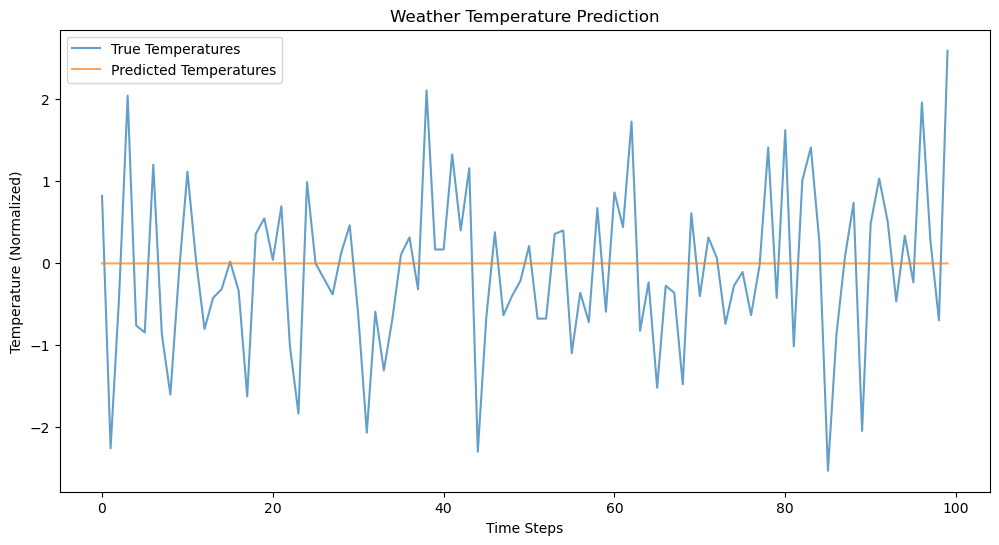

In [34]:

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(true_temps[:100], label='True Temperatures', alpha=0.7)
plt.plot(predicted_temps[:100], label='Predicted Temperatures', alpha=0.7)
plt.title('Weather Temperature Prediction')
plt.xlabel('Time Steps')
plt.ylabel('Temperature (Normalized)')
plt.legend()
plt.show()
